<a href="https://colab.research.google.com/github/pascal-maker/machinelearning/blob/main/Boston_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.covariance import EllipticEnvelope
import seaborn as sns; sns.set(color_codes=True)

In [ ]:
# Read dataset
dataset = pd.read_csv('boston_housing.csv')

In [ ]:
# Show first 10 rows of the dataset
dataset.tail(10)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
496,0.28960,0.0,9.69,0,0.585,5.390,72.900002,2.7986,6,391,19.200001,396.899994,21.139999,413.700016
497,0.26838,0.0,9.69,0,0.585,5.794,70.599998,2.8927,6,391,19.200001,396.899994,14.100000,384.299984
498,0.23912,0.0,9.69,0,0.585,6.019,65.300003,2.4091,6,391,19.200001,396.899994,12.920000,445.200016
499,0.17783,0.0,9.69,0,0.585,5.569,73.500000,2.3999,6,391,19.200001,395.769989,15.100000,367.500000
500,0.22438,0.0,9.69,0,0.585,6.027,79.699997,2.4982,6,391,19.200001,396.899994,14.330000,352.799984
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.670000,470.399992
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.080000,432.600008
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.640000,501.899992
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.480000,462.000000
505,0.04741,0.0,11.93,0,0.573,6.030,80.800003,2.5050,1,273,21.000000,396.899994,7.880000,249.899992


In [ ]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,4.673727,11.363636,11.136779,0.069170,25.892968,87.231275,68.574901,11.445487,9.549407,408.237154,18.455534,356.674030,12.653063,473.188934
std,25.223207,23.322453,6.860353,0.253994,132.093200,747.124382,28.148862,172.108941,8.707259,168.537116,2.164946,91.294863,7.141062,193.139186
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,105.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,357.525002
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,445.200016
75%,3.689388,12.500000,18.100000,0.000000,0.624000,6.630750,94.074999,5.213925,24.000000,666.000000,20.200001,396.225006,16.954999,525.000000
max,537.000000,100.000000,27.740000,1.000000,713.000000,8375.000000,100.000000,3875.000000,24.000000,711.000000,22.000000,396.899994,37.970001,1050.000000


### Description of the features:
- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $\$10,000$
- PTRATIO - pupil-teacher ratio by town
- B - $1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT - % lower status of the population

Drop CHAS values(all 0):
dataset.drop('CHAS', axis=1, inplace=True) #inplace replaces the current dataframe and axis=1 -> column (axis =  0 -> row)- Price - Median value of owner-occupied homes in $1000's

In [ ]:
# Drop CHAS values
dataset.drop('CHAS', axis=1, inplace=True)

Verwijdert de CHAS-kolom uit de dataset, omdat deze alleen maar nullen bevat en geen bijdrage levert aan de voorspelling.

In [ ]:
# Remove outliers (more than 3 standarddeviations away from the mean)

from scipy import stats
dataset = dataset[(np.abs(stats.zscore(dataset)) < 3).all(axis=1)]
dataset.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,Price
count,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000,441.000000
mean,2.649013,9.988662,10.759479,0.547575,6.265785,67.632200,3.851895,8.478458,389.045351,18.387302,375.393853,12.165329,478.785715
std,6.273766,19.941189,6.749778,0.112896,0.685393,27.997824,2.054524,8.000859,158.293650,2.164533,49.296266,6.632866,180.278859
min,0.006320,0.000000,1.250000,0.385000,3.561000,2.900000,1.169100,1.000000,188.000000,12.600000,83.449997,1.730000,105.000000
25%,0.081870,0.000000,5.190000,0.449000,5.877000,45.000000,2.122200,4.000000,277.000000,17.000000,377.730011,6.920000,380.100008
50%,0.217190,0.000000,8.140000,0.524000,6.172000,74.500000,3.375100,5.000000,311.000000,18.700001,392.200012,10.740000,455.700016
75%,1.656600,12.500000,18.100000,0.609000,6.590000,93.599998,5.231100,8.000000,432.000000,20.200001,396.899994,15.940000,525.000000
max,67.920799,80.000000,27.740000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.899994,31.990000,1050.000000


Z-score methode om uitbijters (outliers) te verwijderen.

Waarden verder dan 3 standaarddeviaties van het gemiddelde worden verwijderd.



<Axes: >

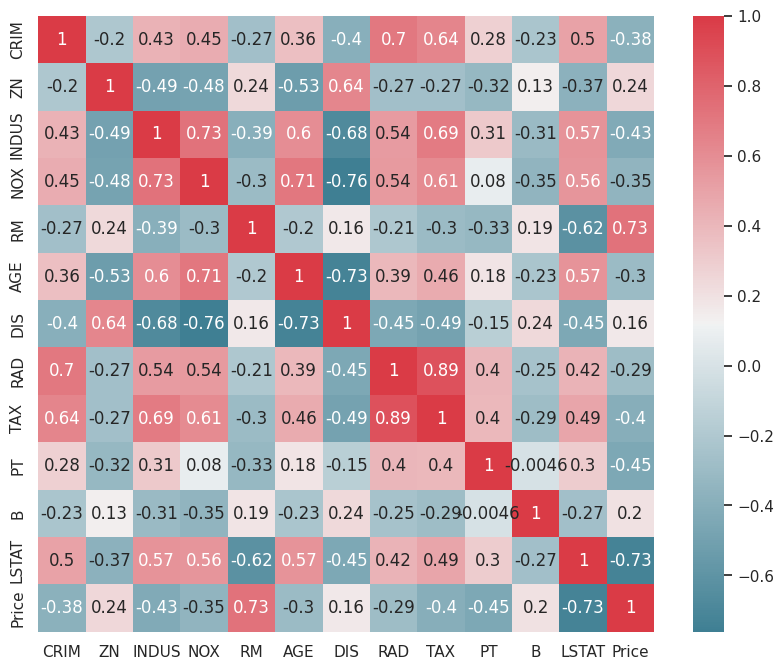

In [ ]:
# Correlations

dataset.corr()

f, ax = plt.subplots(figsize=(10, 8))
corr = dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

Visualiseert de correlatiematrix als een heatmap.

annot=True toont de numerieke correlatiewaarden.

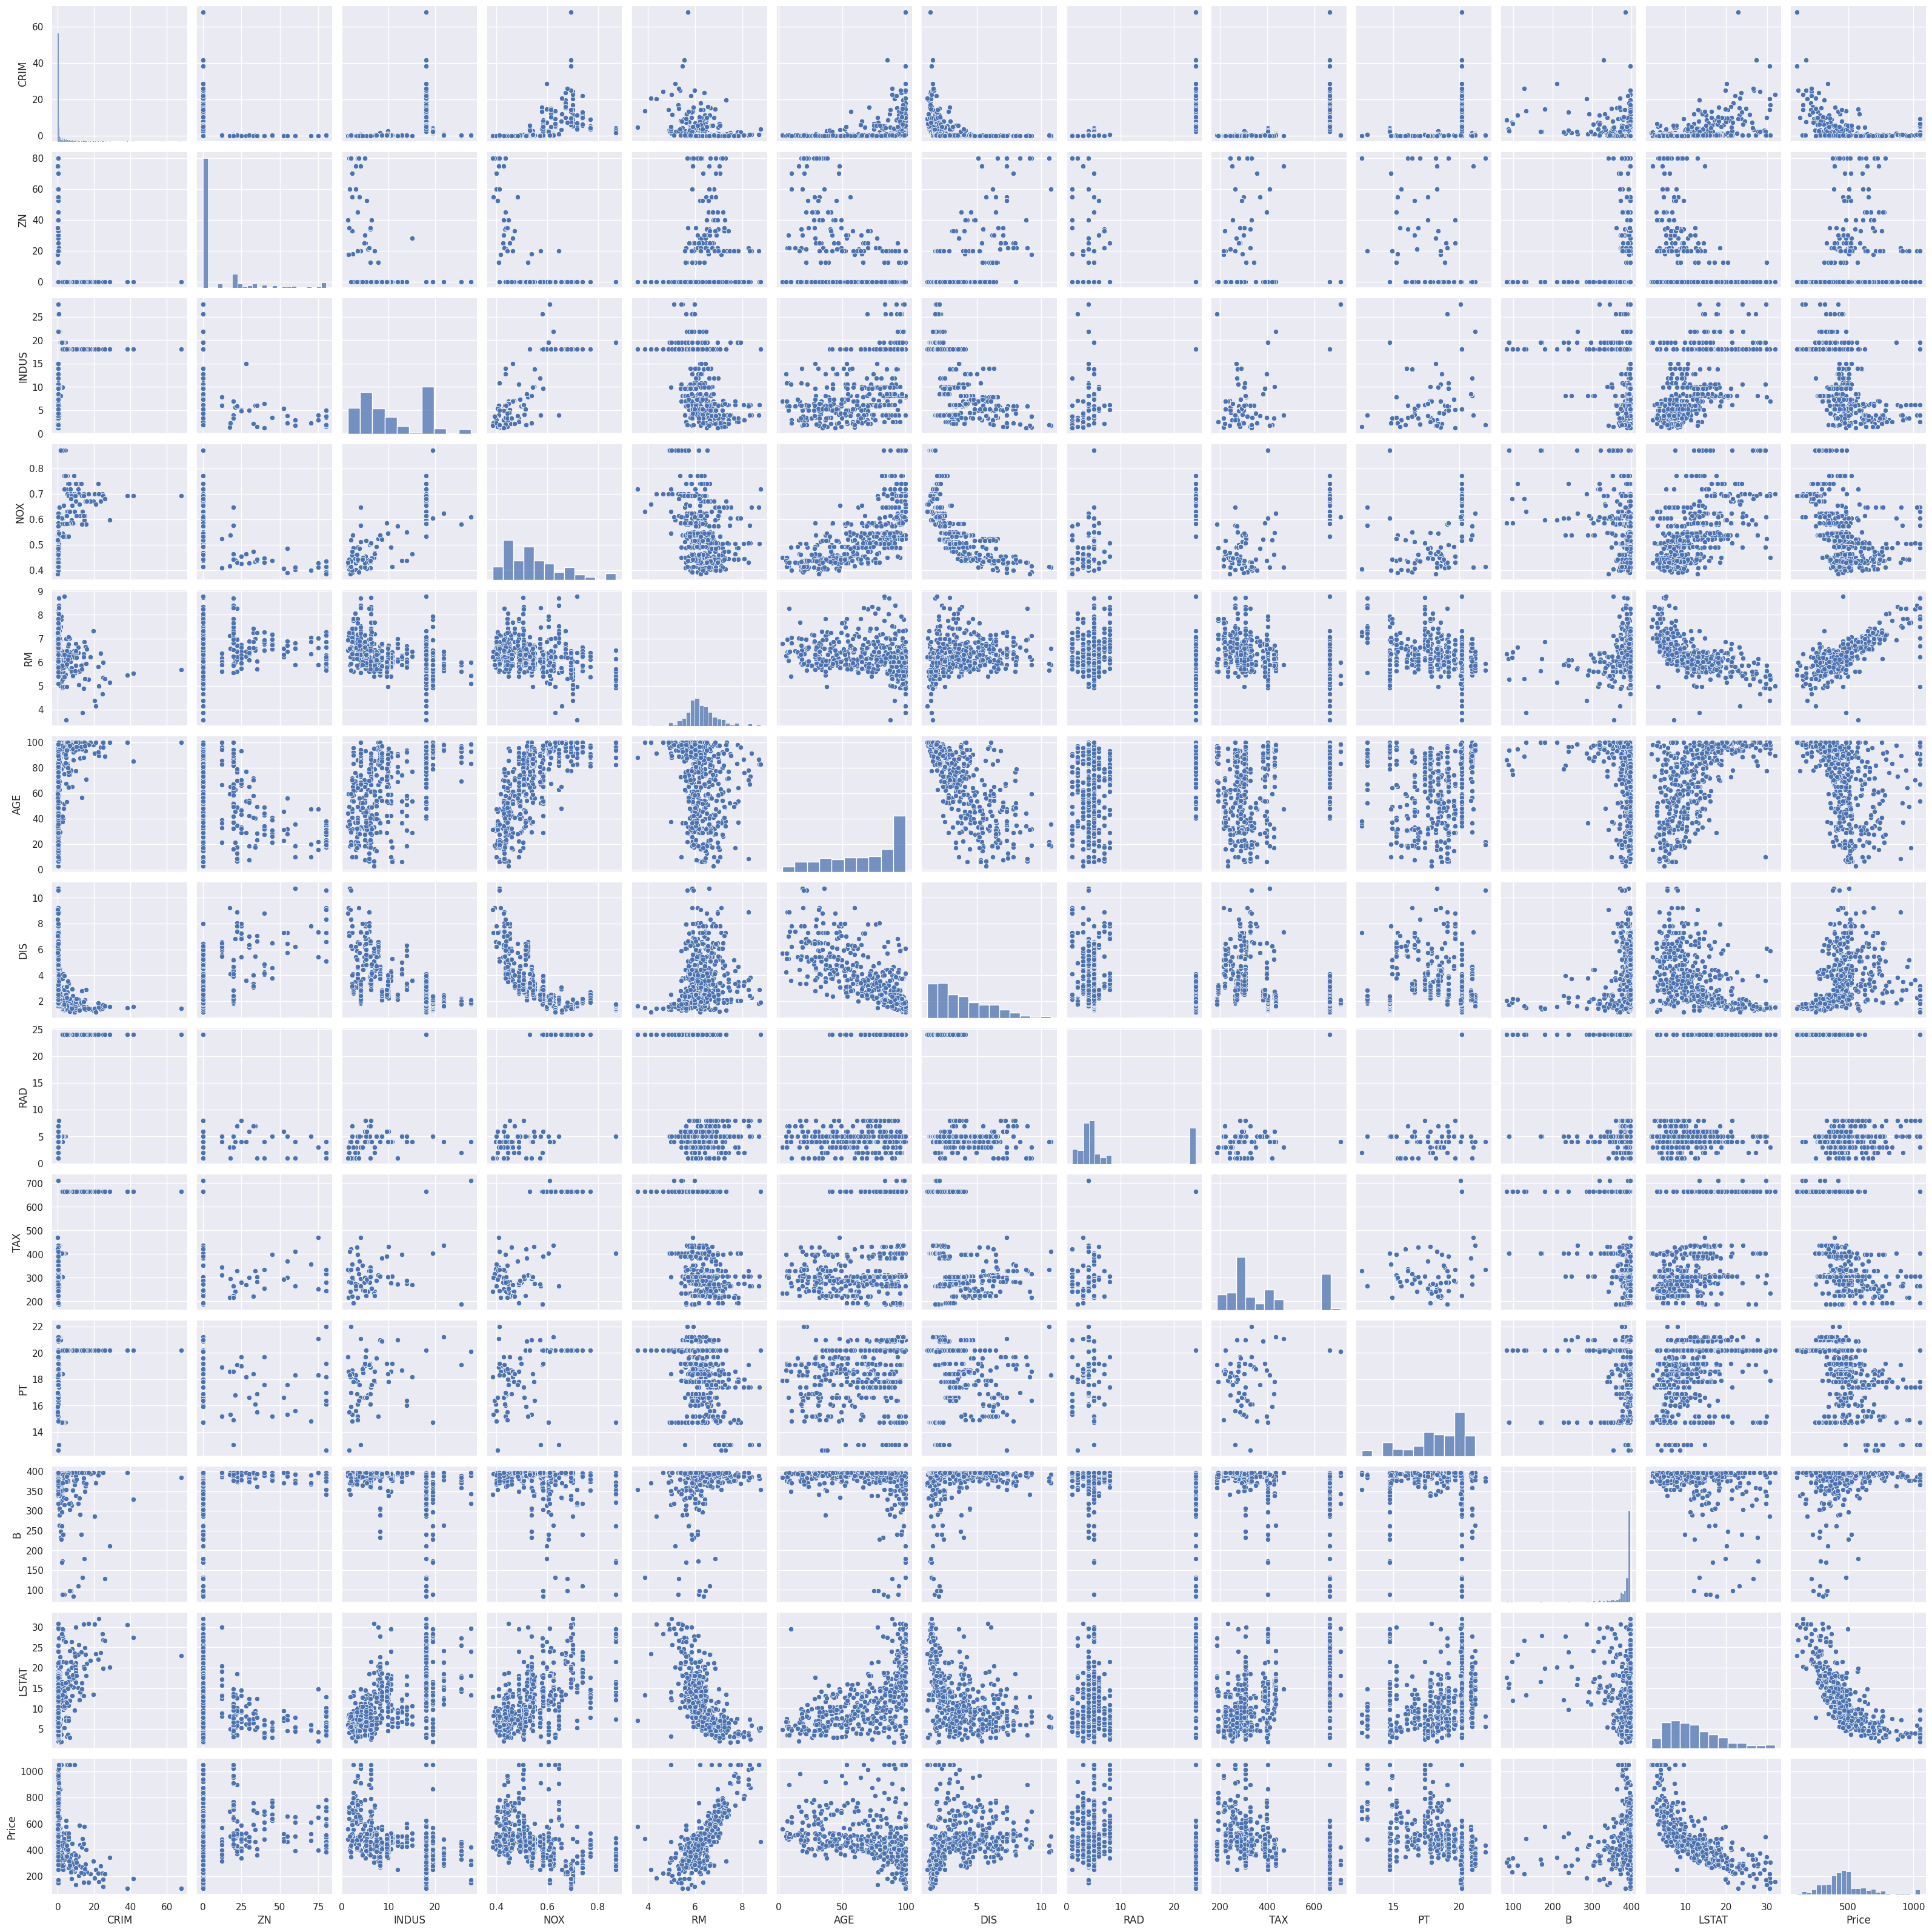

In [ ]:
# pairplot

sns.pairplot(dataset);

Maakt een pairplot van alle numerieke kenmerken.

Toont verdelingen en onderlinge relaties tussen kenmerken.

In [ ]:
# Split in features and targets

#features = list(dataset.columns[:dataset.columns.size-1])
#print(features)
#X = dataset[features].values
#y= dataset['Price'].values

# Alternative 1:
y = dataset['Price'].values
X = dataset.drop(['Price'],axis=1)

# Alternative 2:
# X = dataset.ix[:,0:dataset.columns.size-1].copy()
# Y = dataset.ix[:,dataset.columns.size-1:dataset.columns.size].copy()

y: De doelvariabele (Price).

X: Alle andere kenmerken behalve Price

<Axes: xlabel='LSTAT', ylabel='RM'>

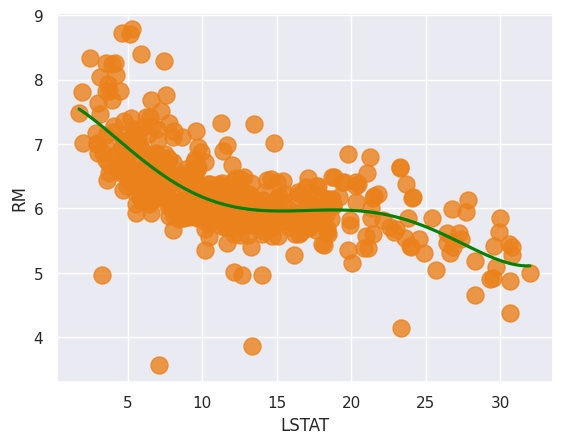

In [ ]:
sns.regplot(x= dataset.LSTAT,y=dataset.RM,color='#EB811B',line_kws={'color': 'green'},ci=None,order=5,scatter_kws={'s':150},truncate=True)


Toont de relatie tussen LSTAT (lage status) en RM (aantal kamers) met een polynoom van orde

In [ ]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

Splitst de dataset in een training set (67%) en test set (33%).



In [ ]:
# Train a regression model
lregmodel = linear_model.LinearRegression()
lregmodel.fit(X_train,y_train)

# Coefficients and intercept of the model
print('coeffs: ',lregmodel.coef_)
print('intercept', lregmodel.intercept_)

coeffs:  [-3.56141289e+00  4.05479295e-01  8.14080284e-01 -2.70514977e+02
  8.96450415e+01 -3.02997261e-01 -2.77339444e+01  7.47151897e+00
 -2.92233040e-01 -1.61741146e+01  7.62044683e-02 -1.17962045e+01]
intercept 650.65202251712


Toont de gewichten (coëfficiënten) van elke feature en de intercept (theta0)

Past een lineair regressiemodel toe op de trainingsdata.

In [ ]:
# Predict the housing price of the following house:
#CRIM  & ZN  & INDUS & NOX  & RM   & AGE    & DIS & RAD & TAX   & PT     & B      & LSTAT
# 0.11 & 0  &  12.03 & 0.57 & 6.80 & 89.30 & 2.39 & 1 & 273  & 21.00  & 393.45 & 6.48

house =np.array([0.11, 0, 12.03, 0.57, 6.80, 89.30, 2.39 , 1 , 273 , 21.00 , 393.45 , 6.48])

price = lregmodel.predict(house.reshape(1,-1))
#print(house.reshape(1,-1).shape)
print('Predicted price: ' , price)

Predicted price:  [563.68335073]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Voorspelt de prijs van een huis met specifieke kenmerke

In [ ]:
# Evaluation of the model

y_predicted = lregmodel.predict(X_test)

## Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

## Mean Squared Error
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

## coefficient of determination = r2 score
from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_predicted)

print('r2 score = ',r2)

### alternative for r2 score
r2 = lregmodel.score(X_test,y_test)
print('r2 score = ', r2)

MAE =  64.00908675857079
MSE =  7803.893327394435
r2 score =  0.7542542349171315
r2 score =  0.7542542349171315


Berekening van Mean Absolute Error (MAE), Mean Squared Error (MSE) en R2 score voor modelprestaties.



In [ ]:
print(X_test[:5,:])
print(y_predicted[:5],'\n')
print(y_test[:5])

InvalidIndexError: (slice(None, 5, None), slice(None, None, None))

In [ ]:
print(X_test[:5]) # Change this line
print(y_predicted[:5],'\n')
print(y_test[:5])

         CRIM    ZN  INDUS    NOX     RM         AGE     DIS  RAD  TAX  \
388  14.33370   0.0  18.10  0.700  4.880  100.000000  1.5895   24  666   
268   0.54050  20.0   3.97  0.575  7.470   52.599998  2.8720    5  264   
292   0.03615  80.0   4.95  0.411  6.630   23.400000  5.1167    4  245   
499   0.17783   0.0   9.69  0.585  5.569   73.500000  2.3999    6  391   
444  12.80230   0.0  18.10  0.740  5.854   96.599998  1.8956   24  666   

            PT           B      LSTAT  
388  20.200001  372.920013  30.620001  
268  13.000000  390.299988   3.160000  
292  19.200001  396.899994   4.700000  
499  19.200001  395.769989  15.100000  
444  20.200001  240.520004  23.790001  
[113.25365749 820.99253092 643.70924288 382.11983433 258.22070141] 

[214.19999601 913.5        585.89999202 367.5        226.80000399]


## Model optimization and hyperparametertuning

In [28]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
#scaler = preprocessing.MaxAbsScaler().fit(X_train)
#scaler = preprocessing.MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Normaliseert de data voor consistentere modelprestaties.



In [ ]:
X_train[0,:]

array([-0.38586271, -0.48532459, -1.14603166, -0.90474794,  2.59566493,
        0.30107077, -0.15755593, -0.80276828, -0.68878646, -0.16453793,
        0.42279636, -1.20699452])

In [ ]:
# L2 regularization: Ridge regression

lregmodel = Ridge(alpha=0.1,tol=0.0001,fit_intercept=True)
lregmodel.fit(X_train,y_train)
lregmodel.score(X_test,y_test)

0.7543015065295564

Ridge (L2 regularisatie) en Lasso (L1 regularisatie) worden getraind om overfitting te beperken door coëfficiënten te straffen.



In [ ]:
# L1 regularization: Lasso regression

lregmodel = Lasso(alpha=0.1,tol=0.0001,fit_intercept=True)
lregmodel.fit(X_train,y_train)
lregmodel.score(X_test,y_test)


0.7547909035292226

In [ ]:
# Adding extra feature: LSTAT^2 LSTAT^3
dataset2  = dataset.copy()
dataset2.insert(dataset2.columns.size-1,'LSTAT^2',dataset.LSTAT**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT^3',dataset.LSTAT**3)
dataset2.insert(dataset2.columns.size-1,'LSTAT*RM',dataset.LSTAT*dataset.RM)
dataset2.insert(dataset2.columns.size-1,'LSTAT*RM^2',dataset.LSTAT*dataset.RM**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT^2*RM^2',(dataset.LSTAT**2)*dataset.RM**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT*AGE',dataset.LSTAT*dataset.AGE)
dataset2.insert(dataset2.columns.size-1,'LSTAT*AGE^2',dataset.LSTAT*dataset.AGE**2)
dataset2.insert(dataset2.columns.size-1,'LSTAT^2*AGE',(dataset.LSTAT**2)*dataset.AGE)
dataset2.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PT,...,LSTAT,LSTAT^2,LSTAT^3,LSTAT*RM,LSTAT*RM^2,LSTAT^2*RM^2,LSTAT*AGE,LSTAT*AGE^2,LSTAT^2*AGE,Price
0,0.00632,18.0,2.31,0.538,6.575,65.199997,4.0900,1,296,15.300000,...,4.98,24.800400,123.505993,32.743499,215.288501,1072.136738,324.695986,21170.177300,1616.986017,504.000000
1,0.02731,0.0,7.07,0.469,6.421,78.900002,4.9671,2,242,17.799999,...,9.14,83.539606,763.552030,58.687942,376.835277,3444.274564,721.146041,56898.423742,6591.275063,453.600008
2,0.02729,0.0,7.07,0.469,7.185,61.099998,4.9671,2,242,17.799999,...,4.03,16.240902,65.450837,28.955551,208.045634,838.423950,246.233007,15044.836331,992.319069,728.700016
3,0.03237,0.0,2.18,0.458,6.998,45.799999,6.0622,3,222,18.700001,...,2.94,8.643600,25.412185,20.574121,143.977701,423.294448,134.652000,6167.061515,395.876889,701.400032
4,0.06905,0.0,2.18,0.458,7.147,54.200001,6.0622,3,222,18.700001,...,5.33,28.408899,151.419431,38.093509,272.254300,1451.115396,288.886000,15657.621416,1539.762358,760.200016


Doel: Verrijkt de dataset met nieuwe kenmerken die niet lineair zijn om complexere patronen te modelleren.

Toegevoegde kenmerken:

LSTAT^2: Kwadratische relatie met LSTAT.

LSTAT^3: Kubische relatie met LSTAT.

LSTAT * RM: Interactie tussen lage status bevolking en aantal kamers.

LSTAT * RM^2: Interactie van lage status bevolking met het kwadraat van kamers.

LSTAT^2 * RM^2: Combinatie van kwadratische termen.

LSTAT * AGE: Interactie tussen lage status bevolking en leeftijd.

LSTAT * AGE^2: Interactie tussen lage status bevolking en het kwadraat van leeftijd.

LSTAT^2 * AGE: Combinatie van kwadratische lage status en leeftijd.

Maakt nieuwe kenmerken op basis van combinaties zoals LSTAT^2 en LSTAT * RM om complexere relaties te modelleren.

In [ ]:
features = list(dataset2.columns[:dataset2.columns.size-1])
print(features)
X = dataset2[features].values
y= dataset2['Price'].values

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=0)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PT', 'B', 'LSTAT', 'LSTAT^2', 'LSTAT^3', 'LSTAT*RM', 'LSTAT*RM^2', 'LSTAT^2*RM^2', 'LSTAT*AGE', 'LSTAT*AGE^2', 'LSTAT^2*AGE']


Splitst de data in training (80%) en test (20%) sets voor het uitgebreide model.



features: Lijst met alle kolommen behalve de doelvariabele (Price).

X: Matrix met alleen de feature waarden.

y: Vector met de doelvariabele Price.

In [ ]:
# Training and testing
lregmodel2 = linear_model.LinearRegression()
lregmodel2.fit(X_train_2,y_train_2)

r2score_2 = lregmodel2.score(X_test_2,y_test_2)
print(r2score_2)


0.8501526177858079


Lineair model wordt getraind met de nieuwe features.

Toont de R² score voor de testset, een maat voor hoe goed het model de variatie in de doelvariabele verklaart.



In [ ]:
# L2 regularization: Ridge regression
lregmodel2 = Ridge(alpha=1,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_2,y_train_2)
lregmodel2.score(X_test_2,y_test_2)


0.8433943179091242

Ridge regressie wordt toegepast met een lage alpha waarde (1) om overfitting te beperken.

De R² score wordt berekend voor de testset.



In [ ]:
# L1 regularization: Lasso regression
lregmodel2 = Lasso(alpha=0.5,tol=0.0001,fit_intercept=True)
lregmodel2.fit(X_train_2,y_train_2)
lregmodel2.score(X_test_2,y_test_2)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+06, tolerance: 1.074e+03
  model = cd_fast.enet_coordinate_descent(


0.8437113338085338

Lasso regressie wordt toegepast, wat coëfficiënten kan elimineren om een eenvoudiger model te krijgen.

De R² score wordt berekend voor de testset.



In [ ]:
# KernelRidge polynomial kernel

from sklearn.kernel_ridge import KernelRidge

lregmodel3 = KernelRidge(alpha=1, degree=3, gamma=None, kernel='polynomial')
lregmodel3.fit(X_train,y_train)


y_predicted = lregmodel3.predict(X_train)
r2 = r2_score(y_train,y_predicted)

print('training set: ',r2)

y_predicted = lregmodel3.predict(X_test)
r2 = r2_score(y_test,y_predicted)

print('test set: ',r2)




training set:  0.9295311464077409
test set:  0.8675498041975723


KernelRidge met een polynoomkern van graad 3.

Berekent de R² score voor zowel de training als de testset om te zien of er sprake is van overfitting.

In [ ]:
# Adding higher order features

from sklearn.preprocessing import PolynomialFeatures


# Generate higher order features
degree = 3

poly = PolynomialFeatures(degree)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)
print('dimension of X_train_poly: ',X_train_poly.shape)
print('dimension of X_test_poly: ',X_test_poly.shape)

print(' ')

# L2 regularization: Ridge regression
lregmodel_poly = Ridge(alpha=100,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)

print('R2 score of L2 - test set: ',lregmodel_poly.score(X_test_poly,y_test))
# R2 -score via L2 on the traing set
print('R2 score of L2 - training set: ',lregmodel_poly.score(X_train_poly,y_train))

print('')

# L1 regularization: Lasso regression
lregmodel_poly = Lasso(alpha=3,tol=0.0001,fit_intercept=True)
lregmodel_poly.fit(X_train_poly,y_train)


print('R2 score of L1 - test set: ',lregmodel_poly.score(X_test_poly,y_test))

# R2 -score via L1 on trainingset
print('R2 score of L1 - training set: ',lregmodel_poly.score(X_train_poly,y_train))


dimension of X_train_poly:  (295, 1771)
dimension of X_test_poly:  (146, 1771)
 
R2 score of L2 - test set:  0.857477129756469
R2 score of L2 - training set:  0.9524841687243588

R2 score of L1 - test set:  0.8619902192614607
R2 score of L1 - training set:  0.9193754091537766


/home/wouter/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Voegt polynoomfeatures toe tot de opgegeven graad (3).

Verhoogt de dimensie van de feature matrix om complexere patronen te kunnen modelleren.

Ridge regressie toegepast op de polynoomfeatures.

Toont de R² score voor zowel de training als de testset.

Lasso regressie toegepast op de polynoomfeatures.

Toont de R² score voor zowel de training als de testset.



Opmerkingen over dit script:
Voordelen van toegevoegde features:

Maakt het model niet-lineair, waardoor complexere relaties worden gemodelleerd.

Verbetert mogelijk de voorspellende kracht voor testdata.

Risico's:

Overfitting door te veel kenmerken.

Hoge computationele belasting door de grote toename in dimensies.

Wil je dat ik je help om de prestaties van deze modellen te vergelijken en te optimaliseren, bijvoorbeeld door cross-validatie en feature selectie toe te voegen? 😊